# Introduction
State notebook purpose here

### Imports
Import libraries and write settings here.

In [34]:
# Data manipulation
import pandas as pd
import numpy as np

# Options for pandas
pd.options.display.max_columns = 50
pd.options.display.max_rows = 30

# Display all cell outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

from IPython import get_ipython
ipython = get_ipython()

# autoreload extension
if 'autoreload' not in ipython.extension_manager.loaded:
    %load_ext autoreload

%autoreload 2

# Visualizations
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
init_notebook_mode(connected=True)

import cufflinks as cf
cf.go_offline(connected=True)
cf.set_config_file(theme='white')

ImportError: 
The plotly.plotly module is deprecated,
please install the chart-studio package and use the
chart_studio.plotly module instead. 


# 1. Постановка задачи


#### ОПИСАНИЕ ЗАДАЧИ

В вашем распоряжении будет база резюме, выгруженная с сайта поиска вакансий hh.ru.

>Файл с исходными данными вы можете скачать [здесь](https://drive.google.com/file/d/1Kb78mAWYKcYlellTGhIjPI-bCcKbGuTn/view?usp=sharing) либо на ноуте в этом модуле.

Проблематика: часть соискателей не указывает желаемую заработную плату, когда составляет своё резюме.

Это является помехой для рекомендательной системы HeadHunter, которая подбирает соискателям список наиболее подходящих вакансий, а работодателям — список наиболее подходящих специалистов.

Компания HeadHunter хочет построить модель, которая бы автоматически определяла примерный уровень заработной платы, подходящей пользователю, исходя из информации, которую он указал о себе. Но, как вы знаете, прежде чем построить модель, данные необходимо преобразовать, исследовать и очистить. В этом и состоит наша с вами задача!

__ОРГАНИЗАЦИОННАЯ ИНФОРМАЦИЯ__

Наш проект будет состоять из четырёх частей:

1. базовый анализ структуры данных

2. преобразование данных

3. разведывательный анализ

4. очистка данных

Каждая часть будет состоять из блока практических заданий, которые вам необходимо выполнить в своих jupyter-ноутбуках, и контрольных вопросов на платформе, отвечая на которые вы сможете проверить верность своего решения. Задания выполняются последовательно.

Помимо проверки заданий на платформе, вам предстоит отправить свой код ментору для code-ревью. Вам будет предоставлен ноутбук-шаблон и требования, согласно которым вы должны оформить своё решение.

__ЧТО НЕОБХОДИМО СДЕЛАТЬ ДЛЯ УСПЕШНОГО ВЫПОЛНЕНИЯ ПРОЕКТА?__

- Внимательно изучить детали задачи.
- Скачать уже знакомый датасет и ноутбук-шаблон (см на ноуте в данном модуле).
- Обязательно ознакомиться с дополнительным теоретическим материалом, который даётся перед заданием.
- Воспользоваться нашими советами и подсказками при выполнении проекта.
- Ответить на все контрольные вопросы: за них вы можете максимально набрать 30 баллов на платформе.
- Загрузить ноутбук со своим решением на GitHub, оформив его в соответствии с требованиями.
- Сдать проект на проверку и получить 10 баллов (из них 8 баллов — за основное задание и 2 балла — за дополнительное) за выводы по разведывательному анализу.
- Получить обратную связь от команды курса.

***
__Требования к оформлению ноутбука-решения__

- Решение оформляется только в Jupyter Notebook.
- Решение оформляется в соответствии с ноутбуком-шаблоном.
- Каждое задание выполняется в отдельной ячейке, выделенной под задание (в шаблоне они помечены как ваш код здесь). Не следует создавать множество ячеек для решения задачи — это создаёт неудобства при проверке.
- Код для каждого задания оформляется в одной-двух jupyter-ячейках (не стоит создавать множество ячеек для решения задачи, это усложняет проверку).
- Решение должно использовать только пройденный материал: переменные, основные структуры данных (списки, словари, множества), циклы, функции, библиотеки numpy, pandas, matplotlib, seaborn, plotly. Если вы думаете, что для решения необходимо воспользоваться сторонними библиотеками или инструментами (например Excel), другими языками программирования или неизученными конструкциями, вы ошибаетесь :) Все задания решаются с помощью уже знакомых методов (в частности функций и метод apply из пандас).
- Код должен быть читаемым и понятным: имена переменных и функций отражают их сущность, важно избегать многострочных конструкций и условий.
- Пользуйтесь руководством PEP 8.
- Графики оформляются в соответствии с теми правилами, которые мы приводили в модуле по визуализации данных.
- Обязательное требование: графики должны содержать название, отражающее их суть, и подписи осей.
- Выводы к графикам оформляются в формате Markdown под самим графиком в отдельной ячейке (в шаблоне они помечены как ваши выводы здесь). Выводы должны быть представлены в виде небольших связанных предложений на русском языке.
***


# 2. Исследование структуры данных

# 2.1
Прочитайте данные с помощью библиотеки Pandas. Перед чтением обратите внимание на разделитель внутри файла.

Чему равна размерность таблицы? Введите её в виде кортежа (число строк, число столбцов).

# 2.2
Выведите несколько первых (последних) строк таблицы, чтобы убедиться в том, что ваши данные не повреждены. Ознакомьтесь с признаками и их структурой.

В каком формате представлен порядок слов в признаке «Пол, возраст»?

In [35]:
hh_data = pd.read_csv('data/dst-3.0_16_1_hh_database.csv', sep=';')
print('Shape of data: {}'.format(hh_data.shape))
hh_data.head()

Shape of data: (44744, 12)


,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
0,"Мужчина , 39 лет , родился 27 ноября 1979",29000 руб.,Системный администратор,"Советск (Калининградская область) , не готов к...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, ва...",Опыт работы 16 лет 10 месяцев Август 2010 — п...,"МАОУ ""СОШ № 1 г.Немана""",Системный администратор,Неоконченное высшее образование 2000 Балтийск...,16.04.2019 15:59,Имеется собственный автомобиль
1,"Мужчина , 60 лет , родился 20 марта 1959",40000 руб.,Технический писатель,"Королев , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, уд...",Опыт работы 19 лет 5 месяцев Январь 2000 — по...,Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",Высшее образование 1981 Военно-космическая ак...,12.04.2019 08:42,Не указано
2,"Женщина , 36 лет , родилась 12 августа 1982",20000 руб.,Оператор,"Тверь , не готова к переезду , не готова к ком...",полная занятость,полный день,Опыт работы 10 лет 3 месяца Октябрь 2004 — Де...,ПАО Сбербанк,Кассир-операционист,Среднее специальное образование 2002 Профессио...,16.04.2019 08:35,Не указано
3,"Мужчина , 38 лет , родился 25 июня 1980",100000 руб.,Веб-разработчик (HTML / CSS / JS / PHP / базы ...,"Саратов , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, удаленная работа",Опыт работы 18 лет 9 месяцев Август 2017 — Ап...,OpenSoft,Инженер-программист,Высшее образование 2002 Саратовский государст...,08.04.2019 14:23,Не указано
4,"Женщина , 26 лет , родилась 3 марта 1993",140000 руб.,Региональный менеджер по продажам,"Москва , не готова к переезду , готова к коман...",полная занятость,полный день,Опыт работы 5 лет 7 месяцев Региональный мене...,Мармелад,Менеджер по продажам,Высшее образование 2015 Кгу Психологии и педаг...,22.04.2019 10:32,Не указано


# 2.3
Выведите основную информацию о числе непустых значений в столбцах и их типах в таблице.

Какой тип данных имеют все столбцы? Введите его в поле для ответа.

# 2.4 
Обратите внимание на информацию о числе непустых значений.

Выберите все признаки, в которых есть пропуски в данных:

In [36]:
hh_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Пол, возраст                     44744 non-null  object
 1   ЗП                               44744 non-null  object
 2   Ищет работу на должность:        44744 non-null  object
 3   Город, переезд, командировки     44744 non-null  object
 4   Занятость                        44744 non-null  object
 5   График                           44744 non-null  object
 6   Опыт работы                      44576 non-null  object
 7   Последнее/нынешнее место работы  44743 non-null  object
 8   Последняя/нынешняя должность     44742 non-null  object
 9   Образование и ВУЗ                44744 non-null  object
 10  Обновление резюме                44744 non-null  object
 11  Авто                             44744 non-null  object
dtypes: object(12)
memory usage: 4.1+

# 2.5
Выведите основную статистическую информацию о столбцах.

Сколько уникальных значений содержится в столбце «Опыт работы»?

Какая из искомых должностей самая распространённая? Введите название.

In [37]:
hh_data.describe()

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
count,44744,44744,44744,44744,44744,44744,44576,44743,44742,44744,44744,44744
unique,16003,690,14929,10063,38,47,44413,30214,16927,40148,18838,2
top,"Мужчина , 32 года , родился 17 сентября 1986",50000 руб.,Системный администратор,"Москва , не готов к переезду , не готов к кома...",полная занятость,полный день,Опыт работы 10 лет 8 месяцев Апрель 2018 — по...,Индивидуальное предпринимательство / частная п...,Системный администратор,Высшее образование 1987 Военный инженерный Кра...,07.05.2019 09:50,Не указано
freq,18,4064,3099,1261,30026,22727,3,935,2062,4,25,32268


# 3. Преобразование данных

_Преобработка данных_

Как вы могли уже заметить, наши данные очень «сырые»: признаки представлены в неудобном для анализа и очистки формате.

Например, столбец «Пол/возраст» содержит информацию и о поле, и о возрасте, и о дате рождения. Желаемая заработная плата представлена в виде текста с указанием валюты, в которой она исчисляется, и так далее…

Всё это не позволяет нам визуально оценить зависимости в данных: построить гистограмму распределения зарплаты и возраста, столбчатую диаграмму зарплаты по уровню образования и многое другое. Более того, мы не можем в таком виде заполнить пропущенные значения числовыми константами или найти выбросы. Иными словами, нам необходимо преобразовать данные, что позволит грамотно работать с ними.

>⚡ Важно! Старайтесь выполнять обработку с помощью функций-преобразований (lambda-функций), которые принимают аргументом элемент столбца и возвращают его преобразованную версию. Данные функции применяйте к признакам с помощью метода apply().

***
Начнём с простого — с признака «Образование и ВУЗ». Его текущий формат — это: <Уровень образования год выпуска ВУЗ специальность...>. Например:

- Высшее образование 2016 Московский авиационный институт (Национальный исследовательский университет)
- Неоконченное высшее образование 2000 Балтийская государственная академия рыбопромыслового флота

Нас будет интересовать только уровень образования. Причём, для простоты мы будем считать, что соискатель указывает свой максимальный уровень образования в первых трёх словах столбца “Образование и ВУЗ”.

Создайте с помощью функции-преобразования новый признак «Образование», который должен иметь четыре категории: «высшее», «неоконченное высшее», «среднее специальное» и «среднее».

Выполните преобразование, ответьте на контрольные вопросы и удалите признак «Образование и ВУЗ».

- Обратите внимание на структуру текста в столбце «Образование и ВУЗ». Гарантируется, что текущий уровень образования соискателя всегда отражён в первых двух словах и начинается с заглавной буквы. Воспользуйтесь этим.
- Проверяйте полученные категории, например с помощью метода unique()

In [38]:
# Определение функции для определения уровня образования
def get_education_level(grade):
    # Уровени образования в спике (ставим неоконченное впереди, для гарантии совпадений)
    grade_levels = ["неоконченное высшее", "высшее", "среднее специальное", "среднее"]
    # Берем первые два слова из данных строк разбиваем их в список и нижний регистр
    words = grade.lower().split(' ')[:2]
    # Полученные слова объединяем в одну строку
    words = ' '.join(words)
    # Циклом берем слова из списка образования и проверяем наличие совпадений в words
    for level in grade_levels:
        # Если есть совпадения
        if level in words:
            return level
    # Если нет
    return None
# Применяем функцию к датафрейму
hh_data['Образование'] = hh_data['Образование и ВУЗ'].apply(get_education_level)
# Удаляем ненужный теперь столбик
hh_data = hh_data.drop(['Образование и ВУЗ'], axis=1)
hh_data.sample()

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Обновление резюме,Авто,Образование
38667,"Женщина , 31 год , родилась 21 июля 1987",30000 руб.,Аналитик,"Челябинск , не готова к переезду , не готова к...",полная занятость,полный день,Опыт работы 5 лет Аналитик 30 000 руб. Информ...,ФГБУ «Челябинская МВЛ»,Начальник организационно-аналитического отдела,22.04.2019 12:26,Не указано,высшее


# 3.1
Сколько соискателей имеет средний уровень образования (школьное образование)?

In [39]:
hh_data['Образование'].value_counts()['среднее']

559

Теперь нас интересует столбец «Пол, возраст». Его текущий формат: <Пол , возраст, дата рождения>. Например:

- Мужчина , 39 лет , родился 27 ноября 1979
- Женщина , 21 год , родилась 13 января 2000

Как вы понимаете, нам необходимо выделить каждый параметр в отдельный столбец..

Создайте два новых признака «Пол» и «Возраст». При этом важно учесть:

Признак пола должен иметь два уникальных строковых значения: М — мужчина, Ж — женщина.
Признак возраста должен быть представлен целыми числами.
Выполните преобразование, ответьте на контрольные вопросы и удалите признак «Пол, возраст» из таблицы.

- Обратите внимание на структуру текста в столбце, а точнее на то, как разделены параметры пола, возраста и даты рождения между собой — символом ' , '.

- Гарантируется, что структура одинакова для всех строк в таблице. Вы можете воспользоваться этим.

In [40]:
# Применяем lambda и формируем столбцы, берем строку и разбиваем (split(',')) ее и 2
# первых значения ([:2]), затем полученный список преобразуеться в серию (pd.Series) и
# из этой серий уже образуем новые столбцы соответственно
hh_data[['Пол', 'Возраст']] = hh_data['Пол, возраст'].apply(lambda x: pd.Series(
                                                        x.split(',')[0:2]))
# Применяем lambda к столбцу и заменяем значение соответственно 
hh_data['Пол'] = hh_data['Пол'].apply(lambda x: 'М' if 'Мужчина' 
                                      in x else 'Ж')
# Здесь избавляемся от лишних слов, проверяем что символ строки это цифра (str.isdigit)
# и применяем ко всем символам с помошью фильтра(filter)
hh_data['Возраст'] = hh_data['Возраст'].apply(lambda x: ''.join(filter(
                                                            str.isdigit, x)))
# Преобразуем str в int (здесь принял решение в int8 так как +127 хватит для хранения)
hh_data['Возраст'] = hh_data['Возраст'].astype('int8')
# Удаляем ненужный теперь столбик
hh_data = hh_data.drop(['Пол, возраст'], axis=1)
hh_data.sample()

,ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Обновление резюме,Авто,Образование,Пол,Возраст
19337,60000 руб.,"Технический специалист, монтажник восл, скс","Москва , м. Проспект Вернадского , не готов к...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график",Опыт работы 5 лет 11 месяцев Сентябрь 2018 — ...,ПАО МГТС,Специалист клиентского сервиса,13.05.2019 12:09,Не указано,среднее специальное,М,26


# 3.2

- Сколько процентов женских резюме представлено в наших данных? Ответ округлите до сотых.

- Чему равен средний возраст соискателей? Ответ округлите до десятых.

In [41]:
round(hh_data['Пол'].value_counts(normalize=True)*100, 2)

М    80.93
Ж    19.07
Name: Пол, dtype: float64

In [42]:
round(hh_data['Возраст'].mean(), 1)

32.2

#### или 
Для того чтобы найти в строке возраст, можно ввести список ключевых слов ["год", "года", "лет"], пройтись по словам в строке и определить индекс одного из ключевых слов. Возрастом будет слово, чей индекс на 1 меньше ключевого. Не забудьте преобразовать строку с возрастом в целое число, например с помощью функции int().

In [43]:
# Поработаем со столбцом опыт работы
# Посмотрим какой формат данных (возмем 10 случайных строк)
hh_data['Опыт работы'].sample(10) 

23773    Опыт работы 2 года 4 месяца  Октябрь 2017 — по...
103      Опыт работы 6 лет 6 месяцев  Октябрь 2014 — по...
21359    Опыт работы 6 лет 10 месяцев  Cистемный админи...
21681    Опыт работы 5 лет 1 месяц  Менеджер 40 000 руб...
38026    Опыт работы 5 лет 7 месяцев  Ноябрь 2017 — по ...
44316    Опыт работы 7 лет 7 месяцев  Сентябрь 2018 — п...
11695    Опыт работы 1 год  Июнь 2018 — по настоящее вр...
31025    Опыт работы 27 лет 11 месяцев  Декабрь 2016 — ...
29195    Опыт работы 8 лет 5 месяцев  Июнь 2014 — по на...
29439    Опыт работы 11 лет 9 месяцев  Сентябрь 2007 — ...
Name: Опыт работы, dtype: object

In [44]:
# преобразуем столбец опыт работы
def get_experience(arg):
    # Проверяем на NaN или "Не указано" и возврашаем None, если находим
    if arg is np.nan or arg == 'Не указано':
        return np.nan
    # Список ключевых слов по которым будем искать 
    month_key_words = ['месяц', 'месяцев', 'месяца']
    year_key_words = ['год', 'лет', 'года']
    # Разбиваем строку через пробел на список и берем первые 6 слов 
    args_splited = arg.split(' ')[:6]
    # Инициируем переменные 
    month = 0
    year = 0
    # С помощью цикла просматриваем список и как только находим ключевое слово, 
    # записываем индекс слова - 1 (там цифры) в переменные
    for i in range(6):
        if args_splited[i] in year_key_words:
            year = args_splited[i-1]
        if args_splited[i] in month_key_words:
            month = args_splited[i-1]
    # Подсчитываем данные и возврашаем
    return int(year)*12 + int(month)

In [45]:
# Применяем фун-ю для получения нового параметра (столбца)
hh_data['Опыт работы (месяц)'] = hh_data['Опыт работы'].apply(get_experience)

In [46]:
# Удаляем столбец 'Опыт работы'
hh_data = hh_data.drop(['Опыт работы'], axis=1)

# 3.3

Чему равен медианный опыт работы (в месяцах) в нашей таблице?

In [47]:
hh_data['Опыт работы (месяц)'].median()

100.0

In [48]:
# Создадим отдельные признаки «Город», «Готовность к переезду», 
# «Готовность к командировкам». 
hh_data['Город, переезд, командировки'].sample(20)

9623     Воронеж , не готова к переезду , не готова к к...
26211    Шахты , не готова к переезду , не готова к ком...
1023     Санкт-Петербург , не готова к переезду , не го...
6734     Узловая , готов к переезду , готов к командиро...
21904    Томск , не готов к переезду , готов к командир...
33489    Казань , не готов к переезду , не готов к кома...
6926     Санкт-Петербург , не готов к переезду , не гот...
13580    Москва , готов к переезду , не готов к команди...
32695    Москва ,  м. Аннино , готова к переезду , гото...
42866    Краснодар , не готов к переезду , не готов к к...
34743    Серпухов , готов к переезду , готов к командир...
36187    Симферополь , не готов к переезду , готов к ре...
3246     Новочебоксарск , готов к переезду , готов к ко...
8353     Хабаровск , готов к переезду (Россия) , готов ...
24955    Снежногорск , готов к переезду (Мурманск, Крас...
39605    Уфа , не готов к переезду , не готов к команди...
39513    Орел , не готов к переезду , не готов к команд.

Портаботаем со столбцом 'Город, переезд, командировки' - извлечем из него город, готовность к переезду и готовность к командировки

In [106]:
"""million_cities = ['Новосибирск', 'Екатеринбург', 'Нижний Новгород', 'Казань', 
                      'Челябинск', 'Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 
                      'Красноярск', 'Пермь', 'Воронеж', 'Волгоград' ]
    
def data_retrieval(arg):
    # Город
    def city(arg):
        # Разбиваем строку и записываем 1 элемент в переменную
        city = arg.split(' ')[:1]
        # Проверяем соотвествует ли переменная городам и возврашаем значения
        if city[0] == 'Москва' or city[0] == 'Санкт-Петербург':
            return city[0]
        elif city[0] in million_cities:
            return 'город-миллионник'
        else:
            return 'другие'
    
    # Готовность к переезду
    def relocation(arg):
        # Проверяем наличие ключевых слов, указывающих на не готовность к переезду
        keywords_not_ready = ['не готов к переезду', 'не готова к переезду']
        for keyword in keywords_not_ready:
            if keyword in arg:
                return False
    
        # Проверяем наличие ключевых слов, указывающих на готовность к переезду
        keywords_ready = ['готов к переезду', 'готова к переезду', 'хочу переехать']
        for keyword in keywords_ready:
            if keyword in arg:
                return True
        
    # Готовность к командировкам
    def work_trip(arg):
        # Проверяем наличие ключевых слов, указывающих на готовность к переезду
        trip_ready = ['готов к командировкам', 'готов к редким командировкам', 
                      'готова к командировкам', 'готова к редким командировкам', 
                      'готов к команд', 'готов к командир'] 
        for keytrip in trip_ready:
            if keytrip in arg:
                return True
        return False
    # Возврашаем полученные значения
    return (city(arg), relocation(arg), work_trip(arg))"""

"million_cities = ['Новосибирск', 'Екатеринбург', 'Нижний Новгород', 'Казань', \n                      'Челябинск', 'Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', \n                      'Красноярск', 'Пермь', 'Воронеж', 'Волгоград' ]\n    \ndef data_retrieval(arg):\n    # Город\n    def city(arg):\n        # Разбиваем строку и записываем 1 элемент в переменную\n        city = arg.split(' ')[:1]\n        # Проверяем соотвествует ли переменная городам и возврашаем значения\n        if city[0] == 'Москва' or city[0] == 'Санкт-Петербург':\n            return city[0]\n        elif city[0] in million_cities:\n            return 'город-миллионник'\n        else:\n            return 'другие'\n    \n    # Готовность к переезду\n    def relocation(arg):\n        # Проверяем наличие ключевых слов, указывающих на не готовность к переезду\n        keywords_not_ready = ['не готов к переезду', 'не готова к переезду']\n        for keyword in keywords_not_ready:\n            if keyword in arg:\n          

In [107]:
"""def data_retrieval(arg):
    # Город
    def city(arg):
        city = arg.split(' ')[:1]
        if city[0] == 'Москва' or city[0] == 'Санкт-Петербург':
            return city[0]
        elif city[0] in million_cities:
            return 'город-миллионник'
        else:
            return 'другие'
    
    # Готовность к переезду
    def relocation(arg):
        keywords_not_ready = ['не готов к переезду', 'не готова к переезду']
        for keyword in keywords_not_ready:
            if keyword in arg:
                return False
    
        keywords_ready = ['готов к переезду', 'готова к переезду', 'хочу переехать']
        for keyword in keywords_ready:
            if keyword in arg:
                return True
        
    # Готовность к командировкам
    def work_trip(arg):
        trip_ready = ['готов к командировкам', 'готов к редким командировкам', 
                      'готова к командировкам', 'готова к редким командировкам', 
                      'готов к команд', 'готов к командир'] 
        for keytrip in trip_ready:
            if keytrip in arg:
                return True
        # Если не найдено ключевых слов, предполагаем, что не готов к командировкам
        return False
            
    # Возвращаем полученные значения
    return city(arg), relocation(arg), work_trip(arg)"""


"def data_retrieval(arg):\n    # Город\n    def city(arg):\n        city = arg.split(' ')[:1]\n        if city[0] == 'Москва' or city[0] == 'Санкт-Петербург':\n            return city[0]\n        elif city[0] in million_cities:\n            return 'город-миллионник'\n        else:\n            return 'другие'\n    \n    # Готовность к переезду\n    def relocation(arg):\n        keywords_not_ready = ['не готов к переезду', 'не готова к переезду']\n        for keyword in keywords_not_ready:\n            if keyword in arg:\n                return False\n    \n        keywords_ready = ['готов к переезду', 'готова к переезду', 'хочу переехать']\n        for keyword in keywords_ready:\n            if keyword in arg:\n                return True\n        \n    # Готовность к командировкам\n    def work_trip(arg):\n        trip_ready = ['готов к командировкам', 'готов к редким командировкам', \n                      'готова к командировкам', 'готова к редким командировкам', \n                 

In [108]:
"""# Применение функции к датафрейму
hh_data[['Город', 'Готовность к переезду', 'Готовность к командировкам']] = hh_data['Город, переезд, командировки'
                                        ].apply(data_retrieval).apply(pd.Series)"""

"# Применение функции к датафрейму\nhh_data[['Город', 'Готовность к переезду', 'Готовность к командировкам']] = hh_data['Город, переезд, командировки'\n                                        ].apply(data_retrieval).apply(pd.Series)"

In [113]:
# Посмотрим какие варианты описываю командировку
# Выгрузим в отдельную серию
trip = hh_data['Город, переезд, командировки']
# Разобъем серию на списки
trip = trip.str.split(',')
# Достанем статусы командировки (они у нас идут последними), считаем список и запишем
# в отдельный список данные по командировке
trip_status = []
for i in trip:
    trip_status.append(i[-1])
# Преобразуем список в серию
trip_status = pd.Series(trip_status)
# Просмотрим статусы
trip_status.value_counts().index

Index([' готов к командировкам', ' не готов к командировкам',
       ' готов к редким командировкам', ' не готова к командировкам',
       ' готова к командировкам', ' готова к редким командировкам', '',
       ' Финлянди', ' готов к команд', ' И', ' К', ' готов к', ' Р',
       ' Приморский край', ' Ростовс', ' Ф', ' Кит', ' Республика Карели',
       ' Пушкино (Московск', ' Словен', ' Ита', ' Эсто', ' Словени',
       ' Новгородская област', ' Ш', ' Республика', ' Республика Ка', ' Япон',
       ' Арханг', ' Германи', ' г', ' Воронежская област', ' Республика Инг',
       ' Шв', ' Дания', ' Швейц', ' Литв', ' Германия', ' Тверска', ' Самарск',
       ' Малайзи', ' Швейца', ' А', ' Г', ' Воронежская обл', ' Республи',
       ' Черногория', ' Рес', ' См', ' Республика Даг', ' Евр', ' Ки', ' Исл',
       ' Хабаровский кр', ' Великобр', ' Свердл', ' Доминиканская Р',
       ' Тюмень', ' Новос', ' Доминикан', ' готов к командир',
       ' Босния и Герцеговина'],
      dtype='object')

In [114]:
# Создадим списки статусов готовности к командировки
trip_ready = ['готов к командировкам', 'готов к редким командировкам', 
              'готова к командировкам', 'готова к редким командировкам', 
              'готов к команд', 'готов к командир'] 
trip_not_ready = ['не готов к командировкам', 'не готова к командировкам']

In [101]:
# преобразуем фун-ий в класс
class DataRetrieval():
    def __init__(self):
        self.million_cities = ['Новосибирск', 'Екатеринбург', 'Нижний Новгород',
                               'Казань', 'Челябинск', 'Омск', 'Самара',
                               'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь',
                               'Воронеж', 'Волгоград']
        
    def city(self, arg):
        city = arg.split(' ')[:1]
        if city[0] == 'Москва' or city[0] == 'Санкт-Петербург':
            return city[0]
        elif city[0] in self.million_cities:
            return 'город-миллионник'
        else:
            return 'другие'
    

    def relocation(self, arg):
        if 'не готов к переезду' in arg or 'не готова к переезду' in arg:
            return False
        elif 'хочу' in arg:
            return True
        else:
            return True


    def work_trip(self, arg):
        if 'командировка' in arg:
            if 'не готов к командировкам' in arg or 'не готова к командировкам' in arg:
                return False
            else:
                return True
        else:
            return False

In [109]:
"""# или

def get_city(arg):
    million_cities = ['Новосибирск', 'Екатеринбург', 'Нижний Новгород',
                      'Казань', 'Челябинск', 'Омск', 'Самара', 'Ростов-на-Дону', 
                      'Уфа', 'Красноярск', 'Пермь', 'Воронеж', 'Волгоград'
                     ]
    city = arg.split(' , ')[0]
    if (city == 'Москва') or (city == 'Санкт-Петербург'):
        return city
    elif city in million_cities:
        return 'город миллионник'
    else:
        return 'другие'
    
def get_ready_to_move(arg):
    if ('не готов к переезду' in arg) or ('не готова к переезду' in arg):
        return False
    elif 'хочу' in arg:
        return True
    else:
        return True
    
def get_ready_for_bisiness_trips(arg):
    if ('командировка' in arg):
        if ('не готов к командировкам' in arg) or('не готова к командировкам' in arg):
            return False
        else: 
            
            return True
    else:
        return False
    
hh_data['Город'] = hh_data['Город, переезд, командировки'].apply(get_city)
hh_data['Готовность к переезду'] = hh_data['Город, переезд, командировки'].apply(get_ready_to_move)
hh_data['Готовность к командировкам'] = hh_data['Город, переезд, командировки'].apply(get_ready_for_bisiness_trips)
#data = data.drop('Город, переезд, командировки', axis=1)
print(round(hh_data['Город'].value_counts(normalize=True)['Санкт-Петербург'] * 100)) 
print(round(hh_data[hh_data['Готовность к переезду'] & hh_data[
    'Готовность к командировкам']].shape[0] / hh_data.shape[0] *100))"""

"# или\n\ndef get_city(arg):\n    million_cities = ['Новосибирск', 'Екатеринбург', 'Нижний Новгород',\n                      'Казань', 'Челябинск', 'Омск', 'Самара', 'Ростов-на-Дону', \n                      'Уфа', 'Красноярск', 'Пермь', 'Воронеж', 'Волгоград'\n                     ]\n    city = arg.split(' , ')[0]\n    if (city == 'Москва') or (city == 'Санкт-Петербург'):\n        return city\n    elif city in million_cities:\n        return 'город миллионник'\n    else:\n        return 'другие'\n    \ndef get_ready_to_move(arg):\n    if ('не готов к переезду' in arg) or ('не готова к переезду' in arg):\n        return False\n    elif 'хочу' in arg:\n        return True\n    else:\n        return True\n    \ndef get_ready_for_bisiness_trips(arg):\n    if ('командировка' in arg):\n        if ('не готов к командировкам' in arg) or('не готова к командировкам' in arg):\n            return False\n        else: \n            \n            return True\n    else:\n        return False\n    \n

In [110]:
data_retrieval = DataRetrieval()

In [111]:
hh_data['Город'] = hh_data['Город, переезд, командировки'].apply(
                                                    data_retrieval.city)
hh_data['Готовность к переезду'] = hh_data['Город, переезд, командировки'].apply(
                                                    data_retrieval.relocation)
hh_data['Готовность к командировкам'] = hh_data['Город, переезд, командировки'].apply(
                                                    data_retrieval.work_trip)


In [23]:
hh_data = hh_data.drop('Город, переезд, командировки', axis=1)

# 3.4 
- Сколько процентов соискателей живут в Санкт-Петербурге? Ответ округлите до целого.
- Сколько процентов соискателей готовы одновременно и к переездам, и к командировкам? Ответ округлите до целого.

In [65]:
hh_data['Город'].value_counts(normalize=True)*100

Москва              37.146880
другие              36.769176
город-миллионник    15.050063
Санкт-Петербург     11.033882
Name: Город, dtype: float64

In [104]:
pivot = hh_data.groupby(by='Готовность к переезду')['Готовность к командировкам'].value_counts()
pivot

Готовность к переезду  Готовность к командировкам
False                  True                          17382
                       False                         11337
True                   True                          14258
                       False                          1767
Name: Готовность к командировкам, dtype: int64

In [115]:
round(hh_data[hh_data['Готовность к переезду'] & hh_data['Готовность к командировкам']
].shape[0] / hh_data.shape[0] *100)

32

Рассмотрим признаки «Занятость» и «График».

создадим признаки-«мигалки» для каждой категории: если категория присутствует в списке желаемых соискателем, то в столбце на месте строки рассматриваемого соискателя ставится True, иначе — False. (One Hot Encoding)

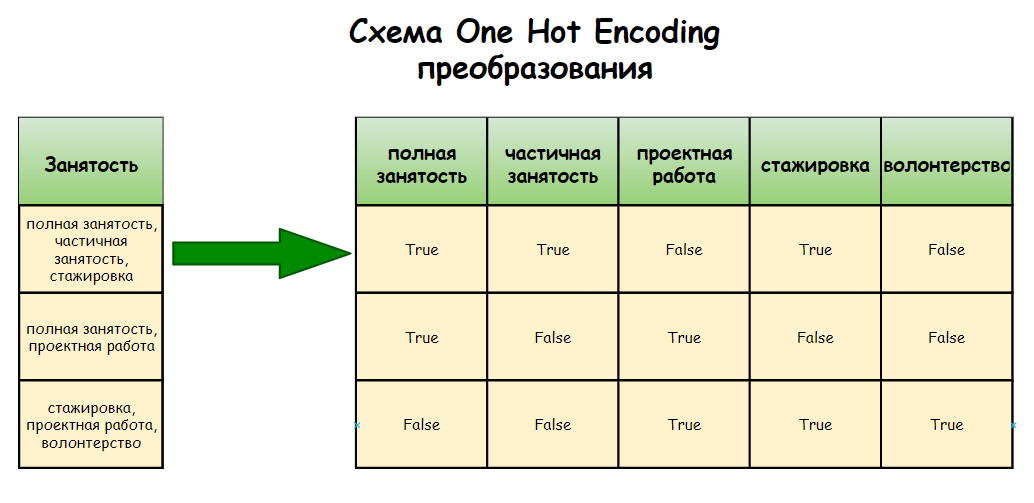


In [142]:
# Нам надо посмотреть какие формы занятости есть. Для этого подсчитаем какие комбинации
# присутствуют и посмотрим их. После этого разобъем их категорий и запишем все в список,
# затем избавимся от повторяющихся категорий
# Инициируем список
ls=[]
# Смотрим список комбинаций
for i in hh_data['Занятость'].value_counts().index:
    # Разбиваем комбинаций на категорий
    i = i.split(', ')
    # Считываем список категорий
    for j in i:
        # Записываем категорий в список
        ls.append(j)
# Убираем повторяющиеся категорий
set(ls)

{'волонтерство',
 'полная занятость',
 'проектная работа',
 'стажировка',
 'частичная занятость'}

In [146]:
ls=[]
# Смотрим список комбинаций
for i in hh_data['График'].value_counts().index:
    # Разбиваем комбинаций на категорий
    i = i.split(', ')
    # Считываем список категорий
    for j in i:
        # Записываем категорий в список
        ls.append(j)
# Убираем повторяющиеся категорий
set(ls)

{'вахтовый метод',
 'гибкий график',
 'полный день',
 'сменный график',
 'удаленная работа'}

In [144]:
data = hh_data.copy()
data

,ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Последнее/нынешнее место работы,Последняя/нынешняя должность,Обновление резюме,Авто,Образование,Пол,Возраст,Опыт работы (месяц),Город,Готовность к переезду,Готовность к командировкам
0,29000 руб.,Системный администратор,"Советск (Калининградская область) , не готов к...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, ва...","МАОУ ""СОШ № 1 г.Немана""",Системный администратор,16.04.2019 15:59,Имеется собственный автомобиль,неоконченное высшее,М,39,202.0,другие,False,False
1,40000 руб.,Технический писатель,"Королев , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, уд...",Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",12.04.2019 08:42,Не указано,высшее,М,60,233.0,другие,False,True
2,20000 руб.,Оператор,"Тверь , не готова к переезду , не готова к ком...",полная занятость,полный день,ПАО Сбербанк,Кассир-операционист,16.04.2019 08:35,Не указано,среднее специальное,Ж,36,123.0,другие,False,False
3,100000 руб.,Веб-разработчик (HTML / CSS / JS / PHP / базы ...,"Саратов , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, удаленная работа",OpenSoft,Инженер-программист,08.04.2019 14:23,Не указано,высшее,М,38,225.0,другие,False,True
4,140000 руб.,Региональный менеджер по продажам,"Москва , не готова к переезду , готова к коман...",полная занятость,полный день,Мармелад,Менеджер по продажам,22.04.2019 10:32,Не указано,высшее,Ж,26,67.0,Москва,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44739,50000 руб.,"Финансист, аналитик, экономист, бухгалтер, мен...","Тверь , готов к переезду (Москва, Химки) , гот...",полная занятость,"полный день, удаленная работа","ООО ""IAS"" (независимый участник объединения Ru...",Руководитель субгруппы,22.04.2019 12:32,Не указано,высшее,М,30,91.0,другие,True,True
44740,39000 руб.,"Системный администратор, IT-специалист","Липецк , готов к переезду , готов к командировкам","проектная работа, частичная занятость, полная ...","удаленная работа, гибкий график, полный день, ...",ИП Пестрецов,Предприниматель,22.04.2019 13:11,Не указано,высшее,М,27,84.0,другие,True,True
44741,40000 руб.,"Аналитик данных, Математик","Челябинск , готова к переезду , готова к редки...",полная занятость,"полный день, удаленная работа","ОАО «ЧМК», Исследовательско-Технологический Це...",Начальник группы аналитики,09.04.2019 05:07,Не указано,высшее,Ж,48,257.0,город-миллионник,True,True
44742,20000 руб.,Контент-менеджер,"Тамбов , не готов к переезду , не готов к кома...","частичная занятость, полная занятость",удаленная работа,IQ-Maxima,Менеджер проектов,26.04.2019 14:25,Имеется собственный автомобиль,высшее,М,24,46.0,другие,False,False


In [148]:
#Лучше реализовать это через цикл с lambda-функциями: 
# Например, data[col].apply(lambda x: employment in x), где employment — одна из категорий занятости.
employments = ['волонтерство', 'полная занятость', 'проектная работа', 'стажировка',
 'частичная занятость']
charts = ['вахтовый метод', 'гибкий график', 'полный день', 'сменный график',
 'удаленная работа']

for employment, chart in zip(employments, charts):
    data[employment] = data['Занятость'].apply(lambda x: employment in x)
    data[chart] = data['График'].apply(lambda x: chart in x)


#где employment и charts - списки возможных типов занятости и графика
data

,ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Последнее/нынешнее место работы,Последняя/нынешняя должность,Обновление резюме,Авто,Образование,Пол,Возраст,Опыт работы (месяц),Город,Готовность к переезду,Готовность к командировкам,волонтерство,вахтовый метод,полная занятость,гибкий график,проектная работа,полный день,стажировка,сменный график,частичная занятость,удаленная работа
0,29000 руб.,Системный администратор,"Советск (Калининградская область) , не готов к...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, ва...","МАОУ ""СОШ № 1 г.Немана""",Системный администратор,16.04.2019 15:59,Имеется собственный автомобиль,неоконченное высшее,М,39,202.0,другие,False,False,False,True,True,True,True,True,False,True,True,True
1,40000 руб.,Технический писатель,"Королев , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, уд...",Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",12.04.2019 08:42,Не указано,высшее,М,60,233.0,другие,False,True,False,False,True,True,True,True,False,True,True,True
2,20000 руб.,Оператор,"Тверь , не готова к переезду , не готова к ком...",полная занятость,полный день,ПАО Сбербанк,Кассир-операционист,16.04.2019 08:35,Не указано,среднее специальное,Ж,36,123.0,другие,False,False,False,False,True,False,False,True,False,False,False,False
3,100000 руб.,Веб-разработчик (HTML / CSS / JS / PHP / базы ...,"Саратов , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, удаленная работа",OpenSoft,Инженер-программист,08.04.2019 14:23,Не указано,высшее,М,38,225.0,другие,False,True,False,False,True,True,True,False,False,False,True,True
4,140000 руб.,Региональный менеджер по продажам,"Москва , не готова к переезду , готова к коман...",полная занятость,полный день,Мармелад,Менеджер по продажам,22.04.2019 10:32,Не указано,высшее,Ж,26,67.0,Москва,False,True,False,False,True,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44739,50000 руб.,"Финансист, аналитик, экономист, бухгалтер, мен...","Тверь , готов к переезду (Москва, Химки) , гот...",полная занятость,"полный день, удаленная работа","ООО ""IAS"" (независимый участник объединения Ru...",Руководитель субгруппы,22.04.2019 12:32,Не указано,высшее,М,30,91.0,другие,True,True,False,False,True,False,False,True,False,False,False,True
44740,39000 руб.,"Системный администратор, IT-специалист","Липецк , готов к переезду , готов к командировкам","проектная работа, частичная занятость, полная ...","удаленная работа, гибкий график, полный день, ...",ИП Пестрецов,Предприниматель,22.04.2019 13:11,Не указано,высшее,М,27,84.0,другие,True,True,False,False,True,True,True,True,False,True,True,True
44741,40000 руб.,"Аналитик данных, Математик","Челябинск , готова к переезду , готова к редки...",полная занятость,"полный день, удаленная работа","ОАО «ЧМК», Исследовательско-Технологический Це...",Начальник группы аналитики,09.04.2019 05:07,Не указано,высшее,Ж,48,257.0,город-миллионник,True,True,False,False,True,False,False,True,False,False,False,True
44742,20000 руб.,Контент-менеджер,"Тамбов , не готов к переезду , не готов к кома...","частичная занятость, полная занятость",удаленная работа,IQ-Maxima,Менеджер проектов,26.04.2019 14:25,Имеется собственный автомобиль,высшее,М,24,46.0,другие,False,False,False,False,True,False,False,False,False,False,True,True


# 3.5
- Сколько людей ищут проектную работу и волонтёрство (в обоих столбцах стоит True)?
- Сколько людей хотят работать вахтовым методом и с гибким графиком (в обоих столбцах стоит True)?

In [150]:
data[data['проектная работа'] & data['волонтерство']].shape[0]

436

In [151]:
data[data['вахтовый метод'] & data['гибкий график']].shape[0]

2311

признак заработной платы «ЗП». 

Указывают ее в разной валюте
[выгрузка](https://lms-cdn.skillfactory.ru/assets/courseware/v1/15abf80f45a2f3e93c3274101b451c67/asset-v1:SkillFactory+DSPR-2.0+14JULY2021+type@asset+block/ExchangeRates.zip) курсов валют, которые встречаются в наших данных за период с 29.12.2017 по 05.12.2019

In [157]:
# Загрузим данные по курсу валют
exchange_rates = pd.read_csv('data/ExchangeRates.csv', sep=',')
# Избавимся от ненужных столбцов
exchange_rates.drop(['per', 'time', 'vol'], axis=1, inplace=True)

In [189]:
exchange_rates

,currency,date,close,proportion
0,USD,29/12/17,57.6291,1
1,USD,30/12/17,57.6002,1
2,USD,31/12/17,57.6002,1
3,USD,01/01/18,57.6002,1
4,USD,02/01/18,57.6002,1
...,...,...,...,...
5659,AZN,02/12/19,37.7729,1
5660,AZN,03/12/19,37.9662,1
5661,AZN,04/12/19,37.8073,1
5662,AZN,05/12/19,37.8396,1


In [201]:
# посмотрим список валют, которые указывают в резюме
currency_symbol=[]
# проидемся по ЗП
for i in hh_data['ЗП']:
    # отсекаем цифры берем только валюту
    i = i.split(' ')[-1]
    # добавляем в список 
    currency_symbol.append(i)

currency_symbol = list(set(currency_symbol))
currency_symbol

['бел.руб.', 'EUR', 'USD', 'KZT', 'грн.', 'AZN', 'руб.', 'KGS', 'сум']

In [197]:
# функция по преобразованию
def char(sign):
    # Получаем строку, разбиваем ее и берем последний элемент. Затем сравниваем и возврашаем его
    sign = sign.split(' ')[-1]
    if sign == 'руб.':
        return 'RUB'
    elif sign == 'грн.':
        return 'UAH'
    elif sign == 'бел.руб.':
        return 'BYN'
    elif sign == 'сум':
        return 'UZS'
    else:
        return sign

In [210]:
data['Валюта'] = data['ЗП'].apply(char)
data['Валюта'].value_counts()

RUB    42471
KZT     1108
USD      628
BYN      329
EUR      106
UAH       73
UZS       20
KGS        6
AZN        3
Name: Валюта, dtype: int64

In [206]:
# Преобразование столбца 'Обновление резюме' в формат datetime
data['Обновление резюме'] = pd.to_datetime(data['Обновление резюме']).dt.date

,ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Последнее/нынешнее место работы,Последняя/нынешняя должность,Обновление резюме,Авто,Образование,Пол,Возраст,Опыт работы (месяц),Город,Готовность к переезду,Готовность к командировкам,волонтерство,вахтовый метод,полная занятость,гибкий график,проектная работа,полный день,стажировка,сменный график,частичная занятость,удаленная работа,ЗП (руб),temp,char_of_money
0,29000 руб.,Системный администратор,"Советск (Калининградская область) , не готов к...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, ва...","МАОУ ""СОШ № 1 г.Немана""",Системный администратор,2019-04-16,Имеется собственный автомобиль,неоконченное высшее,М,39,202.0,другие,False,False,False,True,True,True,True,True,False,True,True,True,False,RUB,RUB
1,40000 руб.,Технический писатель,"Королев , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, уд...",Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",2019-12-04,Не указано,высшее,М,60,233.0,другие,False,True,False,False,True,True,True,True,False,True,True,True,False,RUB,RUB
2,20000 руб.,Оператор,"Тверь , не готова к переезду , не готова к ком...",полная занятость,полный день,ПАО Сбербанк,Кассир-операционист,2019-04-16,Не указано,среднее специальное,Ж,36,123.0,другие,False,False,False,False,True,False,False,True,False,False,False,False,False,RUB,RUB
3,100000 руб.,Веб-разработчик (HTML / CSS / JS / PHP / базы ...,"Саратов , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, удаленная работа",OpenSoft,Инженер-программист,2019-08-04,Не указано,высшее,М,38,225.0,другие,False,True,False,False,True,True,True,False,False,False,True,True,False,RUB,RUB
4,140000 руб.,Региональный менеджер по продажам,"Москва , не готова к переезду , готова к коман...",полная занятость,полный день,Мармелад,Менеджер по продажам,2019-04-22,Не указано,высшее,Ж,26,67.0,Москва,False,True,False,False,True,False,False,True,False,False,False,False,False,RUB,RUB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44739,50000 руб.,"Финансист, аналитик, экономист, бухгалтер, мен...","Тверь , готов к переезду (Москва, Химки) , гот...",полная занятость,"полный день, удаленная работа","ООО ""IAS"" (независимый участник объединения Ru...",Руководитель субгруппы,2019-04-22,Не указано,высшее,М,30,91.0,другие,True,True,False,False,True,False,False,True,False,False,False,True,False,RUB,RUB
44740,39000 руб.,"Системный администратор, IT-специалист","Липецк , готов к переезду , готов к командировкам","проектная работа, частичная занятость, полная ...","удаленная работа, гибкий график, полный день, ...",ИП Пестрецов,Предприниматель,2019-04-22,Не указано,высшее,М,27,84.0,другие,True,True,False,False,True,True,True,True,False,True,True,True,False,RUB,RUB
44741,40000 руб.,"Аналитик данных, Математик","Челябинск , готова к переезду , готова к редки...",полная занятость,"полный день, удаленная работа","ОАО «ЧМК», Исследовательско-Технологический Це...",Начальник группы аналитики,2019-09-04,Не указано,высшее,Ж,48,257.0,город-миллионник,True,True,False,False,True,False,False,True,False,False,False,True,False,RUB,RUB
44742,20000 руб.,Контент-менеджер,"Тамбов , не готов к переезду , не готов к кома...","частичная занятость, полная занятость",удаленная работа,IQ-Maxima,Менеджер проектов,2019-04-26,Имеется собственный автомобиль,высшее,М,24,46.0,другие,False,False,False,False,True,False,False,False,False,False,True,True,False,RUB,RUB


In [209]:
# Преобразуем столбец date в курсах валют
exchange_rates['date'] = pd.to_datetime(exchange_rates['date']).dt.date

,currency,date,close,proportion
0,USD,2017-12-29,57.6291,1
1,USD,2017-12-30,57.6002,1
2,USD,2017-12-31,57.6002,1
3,USD,2018-01-01,57.6002,1
4,USD,2018-02-01,57.6002,1
...,...,...,...,...
5659,AZN,2019-02-12,37.7729,1
5660,AZN,2019-03-12,37.9662,1
5661,AZN,2019-04-12,37.8073,1
5662,AZN,2019-05-12,37.8396,1


In [ ]:
import pandas as pd

# Создаем таблицу с резюме
resume_data = {
    'Дата': ['2023-05-15', '2023-05-16', '2023-05-17'],
    'Валюта': ['USD', 'EUR', 'RUB'],
    'Зарплата': [5000, 4000, 100000],
}

resume_df = pd.DataFrame(resume_data)

# Создаем таблицу с курсами валют
currency_data = {
    'Дата': ['2023-05-15', '2023-05-16', '2023-05-17'],
    'Валюта': ['USD', 'EUR', 'RUB'],
    'close': [70, 80, 1],  # Значение close для рубля заполняем единицей 1
}

currency_df = pd.DataFrame(currency_data)

# Присоединяем таблицу с курсами к таблице с резюме по столбцам 'Дата' и 'Валюта'
merged_df = pd.merge(resume_df, currency_df, left_on=['Обновление резюме', 'Валюта'], right_on=['date', 'currency'] how='left')

print(merged_df)


In [216]:
data = data.merge(exchange_rates, left_on=['Обновление резюме', 'Валюта'], right_on=['date', 'currency'], how='left')


In [231]:
# заменим 
data['close'].fillna(1, inplace=True)
data['proportion'].fillna(1, inplace=True)

In [232]:
data

,ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Последнее/нынешнее место работы,Последняя/нынешняя должность,Обновление резюме,Авто,Образование,Пол,Возраст,Опыт работы (месяц),Город,Готовность к переезду,Готовность к командировкам,волонтерство,вахтовый метод,полная занятость,гибкий график,проектная работа,полный день,стажировка,сменный график,частичная занятость,удаленная работа,ЗП (руб),temp,char_of_money,Валюта,currency,date,close,proportion,digit
0,29000 руб.,Системный администратор,"Советск (Калининградская область) , не готов к...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, ва...","МАОУ ""СОШ № 1 г.Немана""",Системный администратор,2019-04-16,Имеется собственный автомобиль,неоконченное высшее,М,39,202.0,другие,False,False,False,True,True,True,True,True,False,True,True,True,29000.0,RUB,RUB,RUB,NaN,NaN,1.0,1.0,29000
1,40000 руб.,Технический писатель,"Королев , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, уд...",Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",2019-12-04,Не указано,высшее,М,60,233.0,другие,False,True,False,False,True,True,True,True,False,True,True,True,40000.0,RUB,RUB,RUB,NaN,NaN,1.0,1.0,40000
2,20000 руб.,Оператор,"Тверь , не готова к переезду , не готова к ком...",полная занятость,полный день,ПАО Сбербанк,Кассир-операционист,2019-04-16,Не указано,среднее специальное,Ж,36,123.0,другие,False,False,False,False,True,False,False,True,False,False,False,False,20000.0,RUB,RUB,RUB,NaN,NaN,1.0,1.0,20000
3,100000 руб.,Веб-разработчик (HTML / CSS / JS / PHP / базы ...,"Саратов , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, удаленная работа",OpenSoft,Инженер-программист,2019-08-04,Не указано,высшее,М,38,225.0,другие,False,True,False,False,True,True,True,False,False,False,True,True,100000.0,RUB,RUB,RUB,NaN,NaN,1.0,1.0,100000
4,140000 руб.,Региональный менеджер по продажам,"Москва , не готова к переезду , готова к коман...",полная занятость,полный день,Мармелад,Менеджер по продажам,2019-04-22,Не указано,высшее,Ж,26,67.0,Москва,False,True,False,False,True,False,False,True,False,False,False,False,140000.0,RUB,RUB,RUB,NaN,NaN,1.0,1.0,140000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44739,50000 руб.,"Финансист, аналитик, экономист, бухгалтер, мен...","Тверь , готов к переезду (Москва, Химки) , гот...",полная занятость,"полный день, удаленная работа","ООО ""IAS"" (независимый участник объединения Ru...",Руководитель субгруппы,2019-04-22,Не указано,высшее,М,30,91.0,другие,True,True,False,False,True,False,False,True,False,False,False,True,50000.0,RUB,RUB,RUB,NaN,NaN,1.0,1.0,50000
44740,39000 руб.,"Системный администратор, IT-специалист","Липецк , готов к переезду , готов к командировкам","проектная работа, частичная занятость, полная ...","удаленная работа, гибкий график, полный день, ...",ИП Пестрецов,Предприниматель,2019-04-22,Не указано,высшее,М,27,84.0,другие,True,True,False,False,True,True,True,True,False,True,True,True,39000.0,RUB,RUB,RUB,NaN,NaN,1.0,1.0,39000
44741,40000 руб.,"Аналитик данных, Математик","Челябинск , готова к переезду , готова к редки...",полная занятость,"полный день, удаленная работа","ОАО «ЧМК», Исследовательско-Технологический Це...",Начальник группы аналитики,2019-09-04,Не указано,высшее,Ж,48,257.0,город-миллионник,True,True,False,False,True,False,False,True,False,False,False,True,40000.0,RUB,RUB,RUB,NaN,NaN,1.0,1.0,40000
44742,20000 руб.,Контент-менеджер,"Тамбов , не готов к переезду , не готов к кома...","частичная занятость, полная занятость",удаленная работа,IQ-Maxima,Менеджер проектов,2019-04-26,Имеется собственный автомобиль,высшее,М,24,46.0,другие,False,False,False,False,True,False,False,False,False,False,True,True,20000.0,RU

In [225]:
# после извлечения подстроки, соответствующей ЗП, применяется метод filter(str.isdigit, x),
# который применяет метод оставляющий только цифры в строке. Затем функцией join() 
# объединяются все цифры в одну строку. Наконец, с помощью astype(int) строка преобразуется в целое число.
data['digit'] = data['ЗП'].apply(lambda x: ''.join(filter(str.isdigit, x)))
data['digit'] = data['digit'].astype(int)
data

,ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Последнее/нынешнее место работы,Последняя/нынешняя должность,Обновление резюме,Авто,Образование,Пол,Возраст,Опыт работы (месяц),Город,Готовность к переезду,Готовность к командировкам,волонтерство,вахтовый метод,полная занятость,гибкий график,проектная работа,полный день,стажировка,сменный график,частичная занятость,удаленная работа,ЗП (руб),temp,char_of_money,Валюта,currency,date,close,proportion,digit
0,29000 руб.,Системный администратор,"Советск (Калининградская область) , не готов к...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, ва...","МАОУ ""СОШ № 1 г.Немана""",Системный администратор,2019-04-16,Имеется собственный автомобиль,неоконченное высшее,М,39,202.0,другие,False,False,False,True,True,True,True,True,False,True,True,True,False,RUB,RUB,RUB,NaN,NaN,1.0,NaN,29000
1,40000 руб.,Технический писатель,"Королев , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, уд...",Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",2019-12-04,Не указано,высшее,М,60,233.0,другие,False,True,False,False,True,True,True,True,False,True,True,True,False,RUB,RUB,RUB,NaN,NaN,1.0,NaN,40000
2,20000 руб.,Оператор,"Тверь , не готова к переезду , не готова к ком...",полная занятость,полный день,ПАО Сбербанк,Кассир-операционист,2019-04-16,Не указано,среднее специальное,Ж,36,123.0,другие,False,False,False,False,True,False,False,True,False,False,False,False,False,RUB,RUB,RUB,NaN,NaN,1.0,NaN,20000
3,100000 руб.,Веб-разработчик (HTML / CSS / JS / PHP / базы ...,"Саратов , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, удаленная работа",OpenSoft,Инженер-программист,2019-08-04,Не указано,высшее,М,38,225.0,другие,False,True,False,False,True,True,True,False,False,False,True,True,False,RUB,RUB,RUB,NaN,NaN,1.0,NaN,100000
4,140000 руб.,Региональный менеджер по продажам,"Москва , не готова к переезду , готова к коман...",полная занятость,полный день,Мармелад,Менеджер по продажам,2019-04-22,Не указано,высшее,Ж,26,67.0,Москва,False,True,False,False,True,False,False,True,False,False,False,False,False,RUB,RUB,RUB,NaN,NaN,1.0,NaN,140000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44739,50000 руб.,"Финансист, аналитик, экономист, бухгалтер, мен...","Тверь , готов к переезду (Москва, Химки) , гот...",полная занятость,"полный день, удаленная работа","ООО ""IAS"" (независимый участник объединения Ru...",Руководитель субгруппы,2019-04-22,Не указано,высшее,М,30,91.0,другие,True,True,False,False,True,False,False,True,False,False,False,True,False,RUB,RUB,RUB,NaN,NaN,1.0,NaN,50000
44740,39000 руб.,"Системный администратор, IT-специалист","Липецк , готов к переезду , готов к командировкам","проектная работа, частичная занятость, полная ...","удаленная работа, гибкий график, полный день, ...",ИП Пестрецов,Предприниматель,2019-04-22,Не указано,высшее,М,27,84.0,другие,True,True,False,False,True,True,True,True,False,True,True,True,False,RUB,RUB,RUB,NaN,NaN,1.0,NaN,39000
44741,40000 руб.,"Аналитик данных, Математик","Челябинск , готова к переезду , готова к редки...",полная занятость,"полный день, удаленная работа","ОАО «ЧМК», Исследовательско-Технологический Це...",Начальник группы аналитики,2019-09-04,Не указано,высшее,Ж,48,257.0,город-миллионник,True,True,False,False,True,False,False,True,False,False,False,True,False,RUB,RUB,RUB,NaN,NaN,1.0,NaN,40000
44742,20000 руб.,Контент-менеджер,"Тамбов , не готов к переезду , не готов к кома...","частичная занятость, полная занятость",удаленная работа,IQ-Maxima,Менеджер проектов,2019-04-26,Имеется собственный автомобиль,высшее,М,24,46.0,другие,False,False,False,False,True,False,False,False,False,False,True,True,False,RUB,RUB,RUB,NaN,NaN,1.

In [235]:
data['ЗП (руб)'] = data['digit'] * data['close'] / data['proportion']
data['ЗП (руб)'].median()

59019.0

In [230]:
data['close'].value_counts()

1.0000     42471
16.8680      477
17.0151      324
16.8799      226
63.9602      186
           ...  
62.9235        1
65.5871        1
75.9877        1
62.8338        1
67.7911        1
Name: close, Length: 131, dtype: int64

In [ ]:
"""def get_salary_num(arg):
    salary = float(arg.split(' ')[0])
    return salary

def get_salary_currency(arg):
    currency_dict = {
        'USD': 'USD', 'KZT': 'KZT',
        'грн': 'UAH', 'белруб': 'BYN',
        'EUR': 'EUR', 'KGS': 'KGS',
        'сум': 'UZS', 'AZN': 'AZN'
    }
    curr = arg.split(' ')[1].replace('.', '')
    if curr == 'руб':
        return 'RUB'
    else:
        return currency_dict[curr]
    
rates = pd.read_csv('data/ExchangeRates.csv')
rates['date'] = pd.to_datetime(rates['date'], dayfirst=True).dt.date
data['Обновление резюме'] = pd.to_datetime(data['Обновление резюме'], dayfirst=True).dt.date
data['ЗП (tmp)'] = data['ЗП'].apply(get_salary_num)
data['Курс (tmp)'] = data['ЗП'].apply(get_salary_currency)
merged = data.merge(
    rates, 
    left_on=['Курс (tmp)', 'Обновление резюме'],
    right_on=['currency', 'date',], 
    how='left'
)
merged['close'] = merged['close'].fillna(1)
merged['proportion'] = merged['proportion'].fillna(1)
data['ЗП (руб)'] = merged['close'] * merged['ЗП (tmp)'] / merged['proportion']
data = data.drop(['ЗП', 'ЗП (tmp)', 'Курс (tmp)'], axis=1)
print(round(data['ЗП (руб)'].median()/1000)
"""